# Intermediate Importing Data in Python
Run the hidden code cell below to import the data used in this course.

In [1]:
# Importing the course packages
import json
import pandas as pd

# Read the Twitter data
tweets_data = []
tweets_file = open("datasets/tweets.txt", "r")
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)
tweets_file.close()

# Import the other two datasets
wine = pd.read_csv("datasets/winequality-red.csv", sep=";")
latitude = pd.read_excel("datasets/latitude.xls")


### Importing flat files from the web: your turn!

In [2]:
# Import package
from urllib.request import urlretrieve

# Import pandas
import pandas as pd

# Assign url of file: url
url = 'https://assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Save file locally
urlretrieve(url, 'winequality-red.csv')

# Read file into a DataFrame and print its head
df = pd.read_csv('winequality-red.csv', sep=';')
print(df.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]


   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]


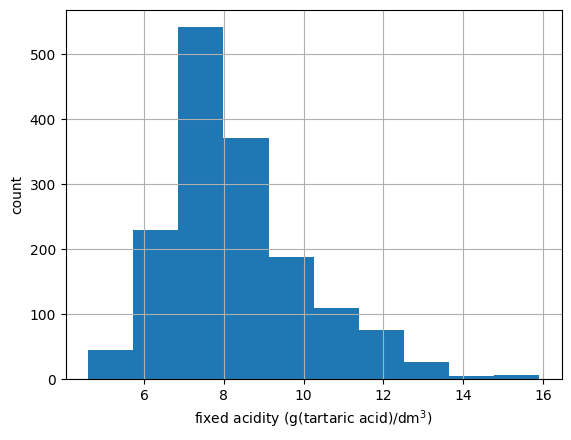

In [3]:
# Import packages
import matplotlib.pyplot as plt

# Assign url of file: url
url = 'https://assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Read file into a DataFrame: df
df = pd.read_csv(url, sep=';')

# Print the head of the DataFrame
print(df.head())

# Plot first column of df
df.iloc[:, 0].hist()
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')
plt.show()


### Importing non-flat files from the web
Congrats! You've just loaded a flat file from the web into a DataFrame without first saving it locally using the pandas function pd.read_csv(). This function is super cool because it has close relatives that allow you to load all types of files, not only flat ones. In this interactive exercise, you'll use pd.read_excel() to import an Excel spreadsheet.

The URL of the spreadsheet is

In [10]:
# Assign url of file: url
url = 'https://assets.datacamp.com/course/importing_data_into_r/latitude.xls'

# Read in all sheets of Excel file: xls
xls = pd.read_excel(url, sheet_name=None)

print(type(xls))

# Look at keys (dictionary type return) # each key is a dataframe type
print(xls.keys(), '\n' ,xls['1700'][:5], '\n', type(xls['1700']), '\n')

# Print the head of the first sheet (using its name, NOT its index)
print(xls['1700'].head())

<class 'dict'>
dict_keys(['1700', '1900']) 
                  country       1700
0            Afghanistan  34.565000
1  Akrotiri and Dhekelia  34.616667
2                Albania  41.312000
3                Algeria  36.720000
4         American Samoa -14.307000 
 <class 'pandas.core.frame.DataFrame'> 

                 country       1700
0            Afghanistan  34.565000
1  Akrotiri and Dhekelia  34.616667
2                Albania  41.312000
3                Algeria  36.720000
4         American Samoa -14.307000


### HTTP requests to import files from the web
* GET request using urllib
```python
from urllib.request import urlopen, Request
url = "https://www.wikipedia.org"
request = Request(url)
response = urlopen(request)
html = response.read()
response.close()
```
* GET request using requests
```python
import requests
url = "https://www.wikipedia.org"
r = requests.get(url)
text = r.text
```

In [13]:
# Import the functions urlopen and Request from the subpackage urllib.request
from urllib.request import urlopen, Request

# Specify URL 
url = "https://campus.datacamp.com/courses/1606/4135?ex=2"

# Package the request to the url "https://campus.datacamp.com/courses/1606/4135?ex=2" using the function Request() and assign it to request
request = Request(url) 

# Send the request and catch the response in the variable response with the function urlopen()
response = urlopen(request) 

# Print the datatype of response
print(type(response))

# Extract the response: html
html = response.read()

# Print the html
print(html[:10], len(html))

# Be polite and close the response!
response.close()


<class 'http.client.HTTPResponse'>
b'<!doctype ' 178730


In [14]:
# Performing HTTP requests in Python using requests

# Import package
import requests

# Specify the url: url
url = "http://www.datacamp.com/teach/documentation"

# Packages the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response: text
text = r.text

# Print the html
print(len(text), text[:25])

36082 <!DOCTYPE html><html lang


### Scraping the web in Python

#### BeautifulSoup
* Package to scrape html elements with API type package for contents unpacking

```python
from bs4 import BeautifulSoup
import requests
url="https:/www.crummy.com/software/BeautifulSoup/"
r=requests.get(url)
html_doc=r.text
soup=BeautifulSoup(html_doc)
```

<br>

### Parsing HTML with BeautifulSoup
In this interactive exercise, you'll learn how to use the BeautifulSoup package to parse, prettify and extract information from HTML. You'll scrape the data from the webpage of Guido van Rossum, Python's very own Benevolent Dictator for Life. In the following exercises, you'll prettify the HTML and then extract the text and the hyperlinks.

In [19]:
# Import package
from bs4 import BeautifulSoup

# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Prettify the BeautifulSoup object: pretty_soup
pretty_soup = soup.prettify()

# Print the response
print(len(pretty_soup), type(pretty_soup), '\n', pretty_soup[:500])

4276 <class 'str'> 
 <html>
 <head>
  <title>
   Guido's Personal Home Page
  </title>
 </head>
 <body bgcolor="#FFFFFF" text="#000000">
  <!-- Built from main -->
  <h1>
   <a href="pics.html">
    <img border="0" src="images/IMG_2192.jpg"/>
   </a>
   Guido van Rossum - Personal Home Page
   <a href="pics.html">
    <img border="0" height="216" src="images/guido-headshot-2019.jpg" width="270"/>
   </a>
  </h1>
  <p>
   <a href="http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond12


### Turning a webpage into data using BeautifulSoup: getting the text

In [21]:
# Quick peek at potential soup attributes/methods
print([x for x in dir(soup) if 'get' in x])

# Get the title of Guido's webpage: guido_title
guido_title = soup.title

# Print the title of Guido's webpage to the shell
print(guido_title)

# Get Guido's text: guido_text
guido_text = soup.get_text()

# Print Guido's text to the shell
print(guido_text)

['__getattr__', '__getattribute__', '__getitem__', '__getstate__', 'get', 'getText', 'get_attribute_list', 'get_text']
<title>Guido's Personal Home Page</title>


Guido's Personal Home Page





Guido van Rossum - Personal Home Page


"Gawky and proud of it."
Who I Am
Read
my "King's
Day Speech" for some inspiration.

I am the author of the Python
programming language.  See also my resume
and my publications list, a brief bio, assorted writings, presentations and interviews (all about Python), some
pictures of me,
my new blog, and
my old
blog on Artima.com.  I am
@gvanrossum on Twitter.

I am currently a Distinguished Engineer at Microsoft.
I have worked for Dropbox, Google, Elemental Security, Zope
Corporation, BeOpen.com, CNRI, CWI, and SARA.  (See
my resume.)  I created Python while at CWI.

How to Reach Me
You can send email for me to guido (at) python.org.
I read everything sent there, but I receive too much email to respond
to everything.

My Name
My name often poses difficulties

### Turning a webpage into data using BeautifulSoup: getting the hyperlinks

In [26]:
import collections

# Find all 'a' tags (which define hyperlinks): a_tags
a_tags = soup.find_all('a')

# Print the URLs to the shell
for a_tag in a_tags[:10]:
    print(a_tag)
    print(a_tag.get('href'))
    
print('\n')

# Type check for all strings of bs4 element types 
link_types = [type(x) for x in a_tags]
link_types_counts = collections.Counter(link_types)
print(f"{len(a_tags)} was our original soup list return amount", '\n')
print(link_types_counts)

<a href="pics.html"><img border="0" src="images/IMG_2192.jpg"/></a>
pics.html
<a href="pics.html"><img border="0" height="216" src="images/guido-headshot-2019.jpg" width="270"/></a>
pics.html
<a href="http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm"><i>"Gawky and proud of it."</i></a>
http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm
<a href="images/df20000406.jpg">Who I Am</a>
images/df20000406.jpg
<a href="http://neopythonic.blogspot.com/2016/04/kings-day-speech.html">"King's
Day Speech"</a>
http://neopythonic.blogspot.com/2016/04/kings-day-speech.html
<a href="http://www.python.org">Python</a>
http://www.python.org
<a href="Resume.html">resume</a>
Resume.html
<a href="Publications.html">publications list</a>
Publications.html
<a href="bio.html">brief bio</a>
bio.html
<a href="http://legacy.python.org/doc/essays/">writings</a>
http://legacy.python.org/doc/essays/


23 was our original soup l

## Interacting with APIs to import data from the web

#### Loading JSONs in Python
```python
import json
#cm
with open('file.json', 'r') as json_file:
    json_data = json.load(json_file)
print(type(json_data))
## type dict
```

In [43]:
# import module
import json

# open file
with open("datasets/a_movies.json", 'r') as json_file:
    json_data = json.load(json_file)
    
    
print(type(json_data), json_data[0])
print(dir(json), '\n')
# Json.dumps method return
print(type(json.dumps(json_data)), '\n')
# Entire JSON encapsulated with .dumps - pass as string
print(json.dumps(json_data), '\n')

# load string into list - load string 
print(type(json.loads(json.dumps(json_data))))


<class 'list'> {'title': 'Dawn of the Planet of the Apes', 'image': 'http://api.androidhive.info/json/movies/1.jpg', 'rating': 8.3, 'releaseYear': 2014, 'genre': ['Action', 'Drama', 'Sci-Fi']}
['JSONDecodeError', 'JSONDecoder', 'JSONEncoder', '__all__', '__author__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_default_decoder', '_default_encoder', 'codecs', 'decoder', 'detect_encoding', 'dump', 'dumps', 'encoder', 'load', 'loads', 'scanner'] 

<class 'str'> 

[{"title": "Dawn of the Planet of the Apes", "image": "http://api.androidhive.info/json/movies/1.jpg", "rating": 8.3, "releaseYear": 2014, "genre": ["Action", "Drama", "Sci-Fi"]}, {"title": "District 9", "image": "http://api.androidhive.info/json/movies/2.jpg", "rating": 8, "releaseYear": 2009, "genre": ["Action", "Sci-Fi", "Thriller"]}, {"title": "Transformers: Age of Extinction", "image": "http://api.androidhive.info/json/movies/3.jpg", "r

### API requests
Now it's your turn to pull some movie data down from the Open Movie Database (OMDB) using their API. The movie you'll query the API about is The Social Network. Recall that, in the video, to query the API about the movie Hackers, Hugo's query string was 'http://www.omdbapi.com/?t=hackers' and had a single argument t=hackers.

Note: recently, OMDB has changed their API: you now also have to specify an API key. This means you'll have to add another argument to the URL: apikey=72bc447a.

In [45]:
# Assign to the variable url the URL of interest in order to query 'http://www.omdbapi.com' for the data corresponding to the movie The Social Network. The query string should have two arguments: apikey=72bc447a and t=the+social+network. You can combine them as follows: apikey=72bc447a&t=the+social+network.

# Assign URL to variable: url
url = 'http://www.omdbapi.com/?apikey=72bc447a&t=the+social+network'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Print the text of the response
print(r.text)


{"Title":"The Social Network","Year":"2010","Rated":"PG-13","Released":"01 Oct 2010","Runtime":"120 min","Genre":"Biography, Drama","Director":"David Fincher","Writer":"Aaron Sorkin, Ben Mezrich","Actors":"Jesse Eisenberg, Andrew Garfield, Justin Timberlake","Plot":"As Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, he is sued by the twins who claimed he stole their idea and by the co-founder who was later squeezed out of the business.","Language":"English, French","Country":"United States","Awards":"Won 3 Oscars. 173 wins & 186 nominations total","Poster":"https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"7.8/10"},{"Source":"Rotten Tomatoes","Value":"96%"},{"Source":"Metacritic","Value":"95/100"}],"Metascore":"95","imdbRating":"7.8","imdbVotes":"714,219","imdbID":"tt1285016","Type":"movie","DVD

In [47]:
# Assign URL to variable: url
url = 'http://www.omdbapi.com/?apikey=72bc447a&t=social+network'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Decode the JSON data into a dictionary: json_data
json_data = r.json()
print(type(json_data))

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])

<class 'dict'>
Title:  The Social Network
Year:  2010
Rated:  PG-13
Released:  01 Oct 2010
Runtime:  120 min
Genre:  Biography, Drama
Director:  David Fincher
Writer:  Aaron Sorkin, Ben Mezrich
Actors:  Jesse Eisenberg, Andrew Garfield, Justin Timberlake
Plot:  As Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, he is sued by the twins who claimed he stole their idea and by the co-founder who was later squeezed out of the business.
Language:  English, French
Country:  United States
Awards:  Won 3 Oscars. 173 wins & 186 nominations total
Poster:  https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg
Ratings:  [{'Source': 'Internet Movie Database', 'Value': '7.8/10'}, {'Source': 'Rotten Tomatoes', 'Value': '96%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Metascore:  95
imdbRating:  7.8
imdbVotes:  714,219
imdbID:  tt1285016
Type:  movie
DVD:  11 Jan 2011

### Checking out Wikipedia API 

In [57]:
# Assign URL to variable: url
url = "https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza"

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Decode the JSON data into a dictionary: json_data
json_data = r.json()

print(type(r), type(json_data))
print(json_data.keys())

print(json_data['query']['pages'], '\n')
print(json_data['query']['pages']['24768']['extract'])

<class 'requests.models.Response'> <class 'dict'>
dict_keys(['batchcomplete', 'warnings', 'query'])
{'24768': {'pageid': 24768, 'ns': 0, 'title': 'Pizza', 'extract': '<link rel="mw-deduplicated-inline-style" href="mw-data:TemplateStyles:r1033289096">\n<p class="mw-empty-elt">\n</p>\n<p><b>Pizza</b> (<span><small>English: </small></span> <i title="English pronunciation respelling"><span>PEET</span>-sə</i>, <small>Italian:\xa0</small><span title="Representation in the International Phonetic Alphabet (IPA)" lang="it-Latn-fonipa">[ˈpittsa]</span>, <small>Neapolitan:\xa0</small><span title="Representation in the International Phonetic Alphabet (IPA)" lang="nap-Latn-fonipa">[ˈpittsə]</span>) is a dish of  Italian origin consisting of a usually round, flat base of leavened wheat-based dough topped with tomatoes, cheese, and often various other ingredients (such as various types of sausage, anchovies, mushrooms, onions, olives, vegetables, meat, ham, etc.), which is then baked at a high temper

### Mock Twitter API

#### Streaming Tweets
```python
# Store credentials in relevant variables
consumer_key = "nZ6EA0FxZ293SxGNg8g8aP0HM"
consumer_secret = "fJGEodwe3KiKUnsYJC3VRndj7jevVvXbK2D5EiJ2nehafRgA6i"
access_token = "1092294848-aHN7DcRP9B4VMTQIhwqOYiB14YkW92fFO8k8EPy"
access_token_secret = "X4dHmhPfaksHcQ7SCbmZa2oYBBVSD2g8uIHXsp5CTaksx"

# Create your Stream object with credentials
stream = tweepy.Stream(consumer_key, consumer_secret, access_token, access_token_secret)

# Filter your Stream variable
stream.filter(['clinton', 'trump', 'sanders', 'cruz'])
```

In [61]:
# Import package
import json

# String of path to file: tweets_data_path
tweets_data_path = 'datasets/tweets.txt'

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys(), len(tweets_data))


dict_keys(['in_reply_to_user_id', 'created_at', 'filter_level', 'truncated', 'possibly_sensitive', 'timestamp_ms', 'user', 'text', 'extended_entities', 'in_reply_to_status_id', 'entities', 'favorited', 'retweeted', 'is_quote_status', 'id', 'favorite_count', 'retweeted_status', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'id_str', 'in_reply_to_screen_name', 'coordinates', 'lang', 'place', 'contributors', 'geo', 'retweet_count', 'source']) 100


### Twitter Data to DataFrame

In [62]:
# Build DataFrame of tweet texts and languages & columns : If data contains column labels, will perform column selection instead.
df = pd.DataFrame(tweets_data, columns=['text', 'lang'])

# Print head of DataFrame
print(df.head())

                                                text lang
0  RT @bpolitics: .@krollbondrating's Christopher...   en
1  RT @HeidiAlpine: @dmartosko Cruz video found.....   en
2  Njihuni me Zonjën Trump !!! | Ekskluzive https...   et
3  Your an idiot she shouldn't have tried to grab...   en
4  RT @AlanLohner: The anti-American D.C. elites ...   en


In [63]:
import re

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False

In [64]:
# Initialize list to store tweet counts
[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    sanders += word_in_text('sanders', row['text'])
    cruz += word_in_text('cruz', row['text'])


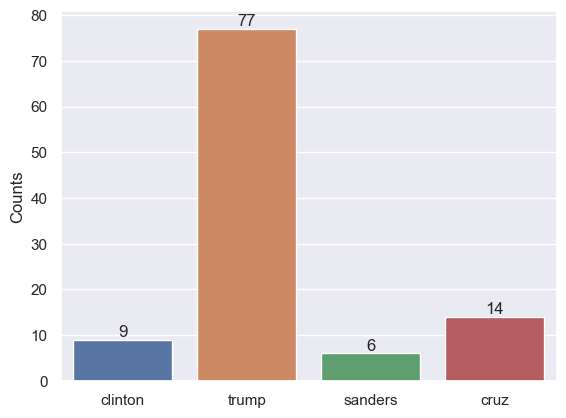

In [88]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['clinton', 'trump', 'sanders', 'cruz']

counts = [clinton, trump, sanders, cruz]

ax = sns.barplot(x=np.arange(4), y=counts)
ax.bar_label(ax.containers[0])
ax.set_xticklabels(cd)
plt.ylabel('Counts')
plt.show()


4 [0 1 2 3]


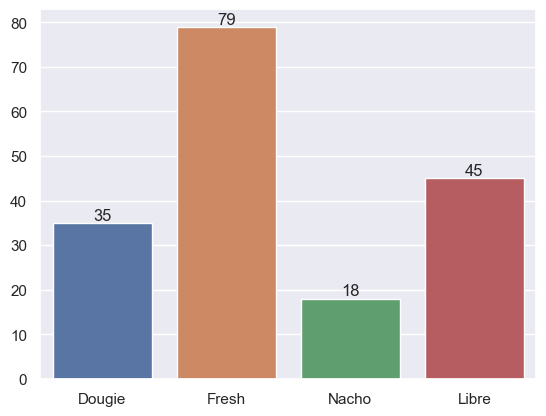

In [85]:
d = [35, 79, 18, 45]
print(len(d), np.arange(len(d)))
ax = sns.barplot(x=np.arange(len(d)), y=d)
ax.bar_label(ax.containers[0])
ax.set_xticklabels(['Dougie', 'Fresh', 'Nacho', 'Libre'])
plt.show()